In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")
np.random.seed(42)
print("Tensorflow Version is :",tf.__version__)

Tensorflow Version is : 2.6.2


## 1. Exploratory Data Analysis:

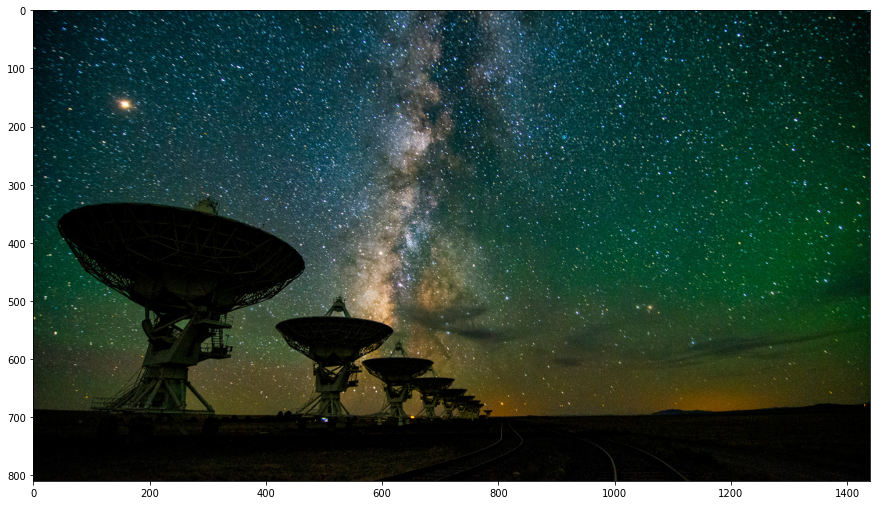

In [74]:
plt.figure(figsize=(15,12))
plt.imshow(plt.imread("../input/allentelescope/allen.jpg"))

In [75]:
train_images = pd.read_csv("../input/seti-radio-signals-csv-dataset/dataset/train/images.csv",header=None)
train_labels = pd.read_csv("../input/seti-radio-signals-csv-dataset/dataset/train/labels.csv",header=None)
val_images = pd.read_csv("../input/seti-radio-signals-csv-dataset/dataset/validation/images.csv",header=None)
val_labels = pd.read_csv("../input/seti-radio-signals-csv-dataset/dataset/validation/labels.csv",header=None)

In [76]:
train_images.head()

0         1         2         3         4         5         6     \
0  0.631373  0.623529  0.713726  0.705882  0.658824  0.666667  0.654902   
1  0.725490  0.752941  0.749020  0.701961  0.690196  0.721569  0.709804   
2  0.717647  0.701961  0.713726  0.733333  0.705882  0.717647  0.725490   
3  0.705882  0.674510  0.654902  0.678431  0.666667  0.662745  0.678431   
4  0.647059  0.729412  0.701961  0.674510  0.611765  0.698039  0.713726   

       7         8         9     ...      8182      8183      8184      8185  \
0  0.635294  0.647059  0.705882  ...  0.682353  0.611765  0.650980  0.658824   
1  0.745098  0.654902  0.721569  ...  0.721569  0.698039  0.721569  0.686275   
2  0.682353  0.717647  0.674510  ...  0.709804  0.694118  0.705882  0.682353   
3  0.662745  0.686275  0.686275  ...  0.639216  0.662745  0.631373  0.643137   
4  0.662745  0.701961  0.674510  ...  0.639216  0.670588  0.705882  0.674510   

       8186      8187      8188      8189      8190      8191  
0  0.600000  0.603922  0.654902  0.694118  0.658824  0.666667  
1  0.713726  0.682353  0.690196  0.698039  0.701961  0.725490  
2  0.639216  0.713726  0.670588  0.678431  0.737255  0.674510  
3  0.705882  0.662745  0.705882  0.666667  0.654902  0.631373  
4  0.721569  0.694118  0.674510  0.705882  0.749020  0.729412  

[5 rows x 8192 columns]

In [77]:
train_labels.head()

0    1    2    3
0  1.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0

<font color="red">
There are 4 labels for the radio signasl according to their features. The first label is represented in the columns zero and the name of this radio signal is Squiggle. We can see the representation of this type of radio signal in the image below:

Text(0.5, 1.0, 'Squiggle Radio Signals')

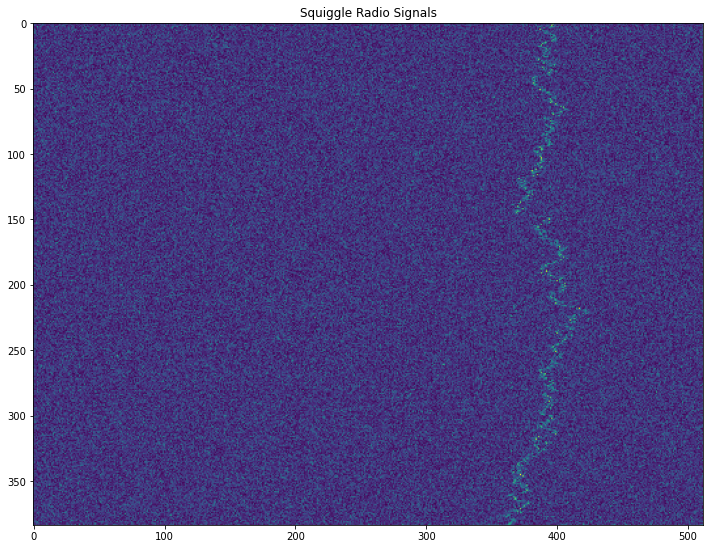

In [78]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/seti-data/primary_small/train/squiggle/1015_squiggle.png"))
plt.title("Squiggle Radio Signals")

<font color="red">
The second column represents narrowband signal as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Narrowband Radio Signals')

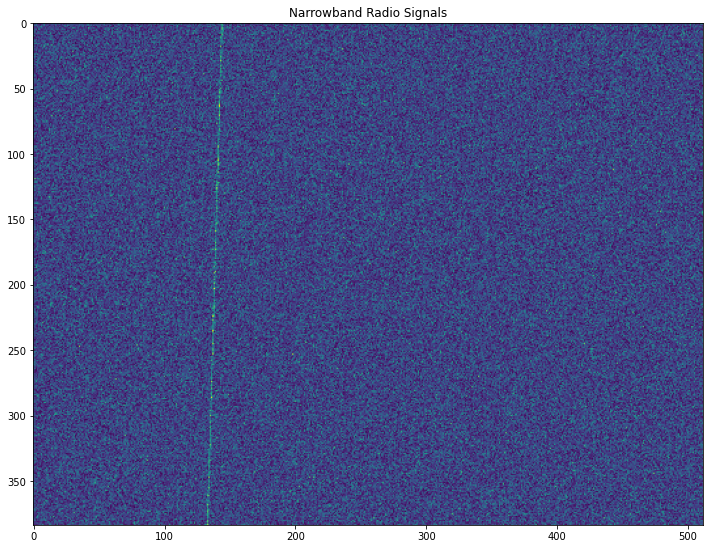

In [79]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/seti-data/primary_small/train/narrowband/1012_narrowband.png"))
plt.title("Narrowband Radio Signals")

<font color="red">
The third column represents Noise as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Noises')

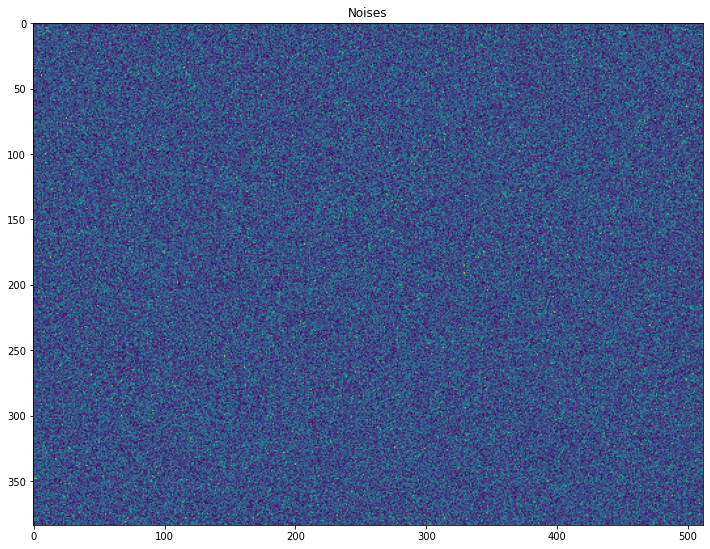

In [81]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/seti-data/primary_small/train/noise/1001_noise.png"))
plt.title("Noises")

<font color="red">
The fourth column represents narrowbanddrd signal as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Narrowbanddrd Radio Signals')

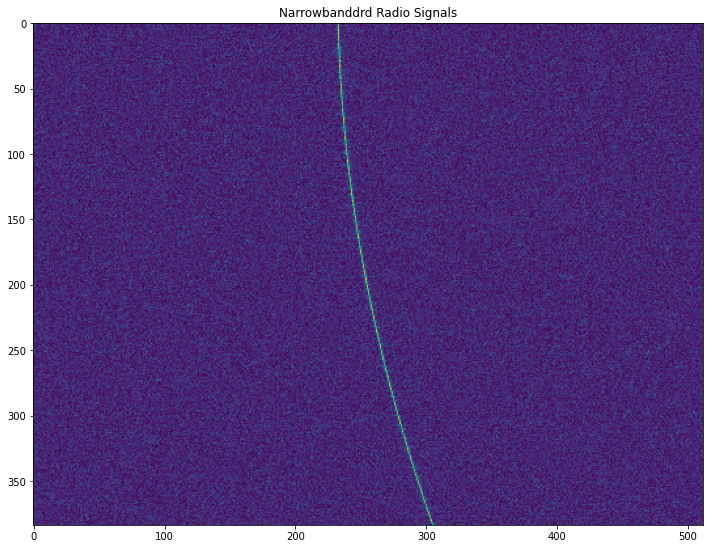

In [82]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/seti-data/primary_small/train/narrowbanddrd/1006_narrowbanddrd.png"))
plt.title("Narrowbanddrd Radio Signals")

## 2. Data Preprocessing and Visualization

In [83]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


<font color="red">
We have 3200 samples in the training set and 800 in the test set. We need to transform the shape of the image in the both train and test set into smaller image before sending convolutional neural networks as follows.The first one represents the number of samples, the second is width of the images. the third is the height and the last one is number of rgb channels:

In [84]:
X_train = train_images.values.reshape(3200,64,128,1) 
X_test = val_images.values.reshape(800,64,128,1)
y_train = train_labels.values
y_test = val_labels.values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 64, 128, 1)
(800, 64, 128, 1)
(3200, 4)
(800, 4)


In [85]:
print(X_train.ndim)
print(X_test.ndim)
print(y_train.ndim)
print(y_test.ndim)

4
4
2
2


<font color="red">
X_train and X_test which represents the features of the radio signals are 4D numpy arrays as seen in the example below:

In [86]:
X_train[0]

array([[[0.631373],
        [0.623529],
        [0.713726],
        ...,
        [0.615686],
        [0.658824],
        [0.705882]],

       [[0.662745],
        [0.666667],
        [0.65098 ],
        ...,
        [0.647059],
        [0.670588],
        [0.690196]],

       [[0.6     ],
        [0.643137],
        [0.635294],
        ...,
        [0.670588],
        [0.639216],
        [0.705882]],

       ...,

       [[0.666667],
        [0.678431],
        [0.643137],
        ...,
        [0.670588],
        [0.580392],
        [0.635294]],

       [[0.603922],
        [0.619608],
        [0.588235],
        ...,
        [0.701961],
        [0.65098 ],
        [0.647059]],

       [[0.52549 ],
        [0.533333],
        [0.631373],
        ...,
        [0.694118],
        [0.658824],
        [0.666667]]])

<font color="red">
y_train and y_test which represents the labels of the radio signals are 2D numpy arrays as seen in the example below:

In [87]:
y_train[0]

array([1., 0., 0., 0.])

<font color="red">
Now lets visualize how the images look like:

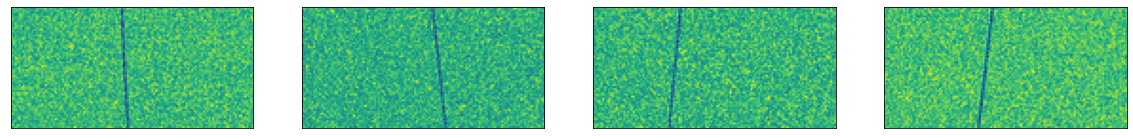

In [88]:
plt.figure(figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0])])

<font color="red">
We see gray color representations of the images:

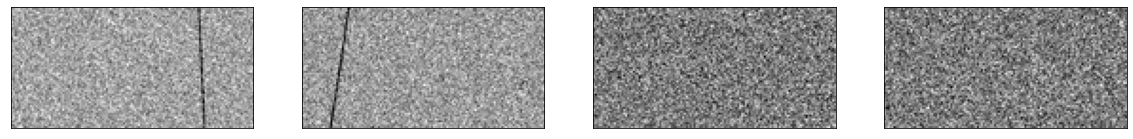

In [89]:
plt.figure(figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0])],cmap="gray")

## 3. Create Training and Validation Data Generators and CNN Model

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        horizontal_flip=True)
train_datagen.fit(X_train)
test_datagen.fit(X_test)

ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

## 3.1. Building the Model

<font color="red">
Convolutional layer takes an input volume Applies a filter at every position of the input Outputs another volume (usually of different size).
Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. It is used to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features

In [127]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

In [128]:
cnn = Sequential()
#Adding 1. Convolution Layer
cnn.add(Conv2D(filters=32,kernel_size=5,activation="relu",padding="same", input_shape=(64,128,1))) 
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

#Adding 2. Convolution Layer
cnn.add(Conv2D(filters=32,kernel_size=5,activation="relu",padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

# Adding Flattening
cnn.add(Flatten())

# Adding fully connected layer
cnn.add(Dense(units=1024, activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.4))   

cnn.add(Dense(4, activation='softmax'))

## 3.2. Learning Rate Scheduling and Compile the Model

<font color="red">
This will calculate 0.005 * (0.96 **5) in every 5 steps and recalculate learning steps and the result of this operation as the learning step.


In [129]:
initial_learning_rate = 0.005
learning_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate,
                    decay_steps=5,
                    decay_rate=0.96,
                    staircase=True)
# This will calculate 0.005 * (0.96 **5) in every 5 steps and recalculate learning steps and the result of this operation as the leanring step
optimizer = Adam(learning_rate=learning_schedule)

In [130]:
cnn.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy"])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 128, 32)       128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 64, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 64, 32)        25632     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 64, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 32, 32)       

## 3.3.Training the Model

<font color="red">
ModelCheckpoint enables us to save the highest accurate weights to use it for future predictions.

In [131]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [checkpoint,EarlyStopping(monitor='val_loss',patience=4)]
batch_size = 32
history = cnn.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_test)//batch_size,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
100/100 [==============================] - 25s 244ms/step - loss: 0.7110 - accuracy: 0.6737 - val_loss: 37.5089 - val_accuracy: 0.2500
Epoch 2/50
100/100 [==============================] - 24s 243ms/step - loss: 0.5350 - accuracy: 0.7163 - val_loss: 57.8852 - val_accuracy: 0.2438
Epoch 3/50
100/100 [==============================] - 24s 239ms/step - loss: 0.4261 - accuracy: 0.7356 - val_loss: 79.3153 - val_accuracy: 0.2525
Epoch 4/50
100/100 [==============================] - 24s 245ms/step - loss: 0.4211 - accuracy: 0.7325 - val_loss: 60.1620 - val_accuracy: 0.4950
Epoch 5/50
100/100 [==============================] - 24s 244ms/step - loss: 0.3931 - accuracy: 0.7525 - val_loss: 22.3477 - val_accuracy: 0.5000
Epoch 6/50
100/100 [==============================] - 24s 243ms/step - loss: 0.3921 - accuracy: 0.7550 - val_loss: 3.5177 - val_accuracy: 0.5000
Epoch 7/50
100/100 [==============================] - 24s 245ms/step - loss: 0.3960 - accuracy: 0.7372 - val_loss: 2.0566 - v

## 4. MAKING PREDICTIONS AND EVALUATING THE MODEL PERFORMANCE

In [132]:
pd.DataFrame(cnn.history.history)

loss  accuracy   val_loss  val_accuracy
0   0.711010  0.673750  37.508865       0.25000
1   0.534981  0.716250  57.885204       0.24375
2   0.426080  0.735625  79.315269       0.25250
3   0.421116  0.732500  60.161972       0.49500
4   0.393077  0.752500  22.347725       0.50000
5   0.392130  0.755000   3.517669       0.50000
6   0.396024  0.737188   2.056637       0.50625
7   0.392812  0.746562   1.918833       0.51375
8   0.387808  0.752187   0.567589       0.69750
9   0.387804  0.750000   0.531625       0.69625
10  0.393102  0.745625   0.515958       0.70625
11  0.387409  0.751562   0.514378       0.70500
12  0.389526  0.745313   0.511662       0.71250
13  0.390165  0.750000   0.499850       0.71750
14  0.399601  0.731250   0.501000       0.71625
15  0.390335  0.751875   0.501802       0.72125
16  0.389042  0.750000   0.501125       0.71000
17  0.384023  0.752813   0.497570       0.72375
18  0.385242  0.749062   0.498637       0.70875
19  0.384002  0.761250   0.497001       0.72375
20  0.392954  0.750313   0.498656       0.70625
21  0.390359  0.751250   0.499146       0.70250
22  0.404378  0.743438   0.493307       0.71750
23  0.386569  0.751875   0.492982       0.69875
24  0.388336  0.746875   0.499437       0.71125
25  0.389417  0.743125   0.496076       0.71500
26  0.397747  0.752500   0.496886       0.71750
27  0.400669  0.741875   0.496763       0.70875

<AxesSubplot:>

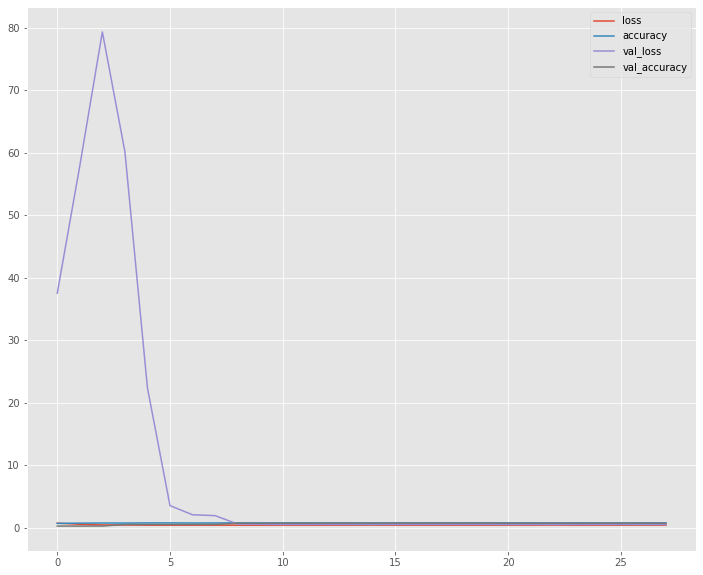

In [136]:
plt.style.use("ggplot")
pd.DataFrame(cnn.history.history).plot(figsize=(12,10))

In [137]:
print(cnn.evaluate(X_train,y_train))

100/100 [==============================] - 6s 58ms/step - loss: 0.4709 - accuracy: 0.7525
[0.47086426615715027, 0.7524999976158142]


In [138]:
print(cnn.evaluate(X_test,y_test))

25/25 [==============================] - 1s 56ms/step - loss: 0.5027 - accuracy: 0.7038
[0.5027121305465698, 0.7037500143051147]


In [176]:
predictions = cnn.predict(X_test)
y_true = np.argmax(y_test, 1)
y_pred = np.argmax(predictions, 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       200
           1       0.40      0.32      0.36       200
           2       0.49      0.67      0.56       200
           3       1.00      1.00      1.00       200

    accuracy                           0.70       800
   macro avg       0.72      0.70      0.71       800
weighted avg       0.72      0.70      0.71       800

Classification accuracy: 0.703750


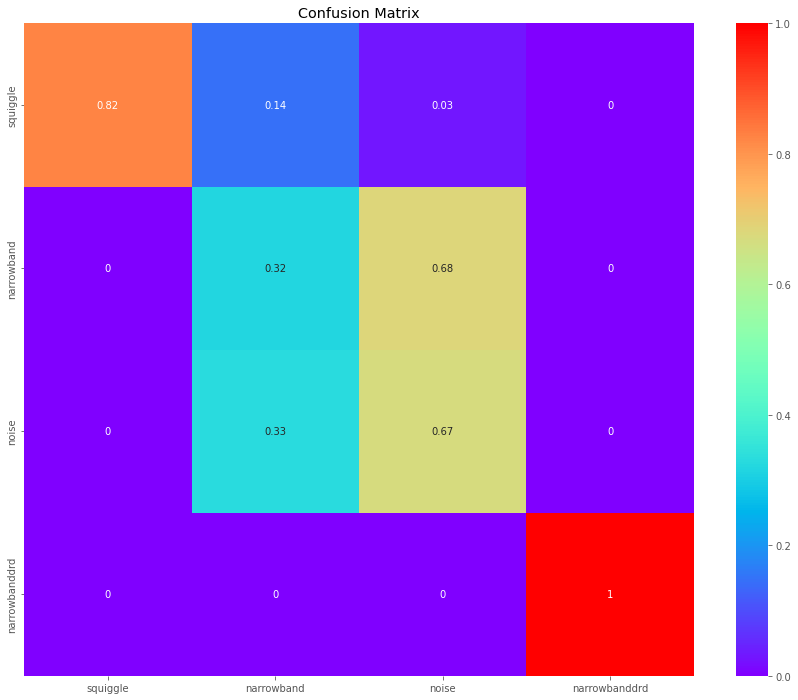

In [150]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
plt.figure(figsize=(15,12))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax=ax,cmap="rainbow"); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [187]:
np.argmax(predictions,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,

In [192]:
np.argmax(y_test,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [198]:
predictions_df = pd.DataFrame(np.argmax(predictions,1),columns=["Predictions"])
y_test_df = pd.DataFrame(np.argmax(y_test,1),columns=["Real Values"])
comparison_df = pd.concat([y_test_df, predictions_df],axis=1)
comparison_df 

Real Values  Predictions
0              0            0
1              0            0
2              0            0
3              0            0
4              0            0
..           ...          ...
795            1            1
796            1            2
797            1            2
798            1            2
799            1            1

[800 rows x 2 columns]

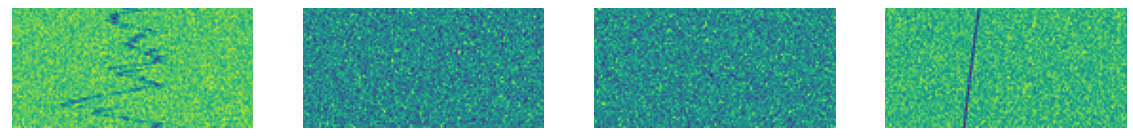

In [204]:
plt.figure(figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0])])

In [225]:
labels = ["squiggle",  "narrowband","noise" ,"narrowbanddrd",]
labels[comparison_df["Predictions"][0]]

'squiggle'

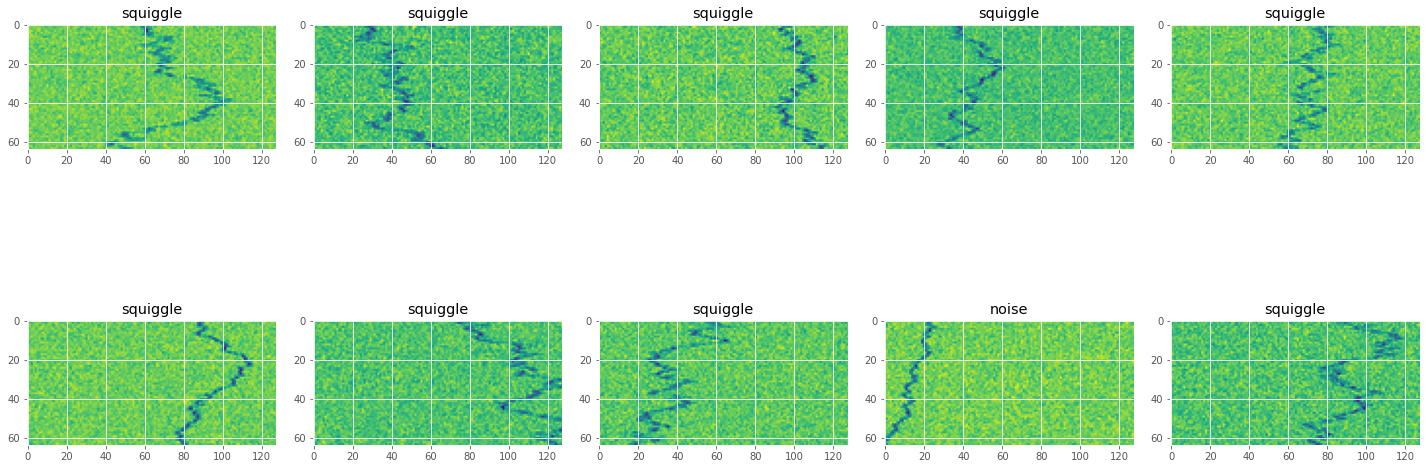

In [214]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs[0][0].title.set_text(labels[comparison_df["Predictions"][0]])
axs[0][0].imshow(X_test[0])
axs[0][1].title.set_text(labels[comparison_df["Predictions"][1]])
axs[0][1].imshow(X_test[1]) 
axs[0][2].title.set_text(labels[comparison_df["Predictions"][2]])
axs[0][2].imshow(X_test[2])
axs[0][3].title.set_text(labels[comparison_df["Predictions"][3]])
axs[0][3].imshow(X_test[3])  
axs[0][4].title.set_text(labels[comparison_df["Predictions"][4]])
axs[0][4].imshow(X_test[4])    
axs[1][0].title.set_text(labels[comparison_df["Predictions"][5]])
axs[1][0].imshow(X_test[5])   
axs[1][1].title.set_text(labels[comparison_df["Predictions"][6]])
axs[1][1].imshow(X_test[6])  
axs[1][2].title.set_text(labels[comparison_df["Predictions"][7]])
axs[1][2].imshow(X_test[7]) 
axs[1][3].title.set_text(labels[comparison_df["Predictions"][8]])
axs[1][3].imshow(X_test[8])  
axs[1][4].title.set_text(labels[comparison_df["Predictions"][9]])
axs[1][4].imshow(X_test[9])

fig.tight_layout()

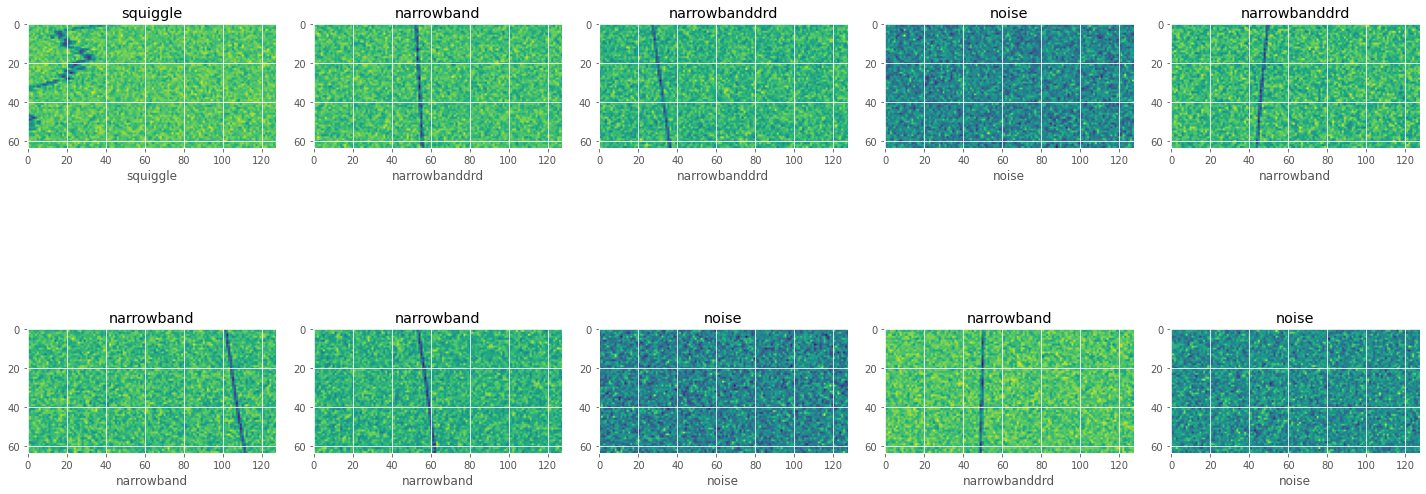

In [227]:
random = np.random.randint(0,800)
labels = ["squiggle", "narrowband",  "narrowbanddrd","noise"]
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs[0][0].title.set_text(labels[comparison_df["Predictions"][random]])
axs[0][0].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[0][0].imshow(X_test[random])
random = np.random.randint(0,800)
axs[0][1].title.set_text(labels[comparison_df["Predictions"][random]])
axs[0][1].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[0][1].imshow(X_test[random]) 
random = np.random.randint(0,800)
axs[0][2].title.set_text(labels[comparison_df["Predictions"][random]])
axs[0][2].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[0][2].imshow(X_test[random])
random = np.random.randint(0,800)
axs[0][3].title.set_text(labels[comparison_df["Predictions"][random]])
axs[0][3].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[0][3].imshow(X_test[random])
random = np.random.randint(0,800)
axs[0][4].title.set_text(labels[comparison_df["Predictions"][random]])
axs[0][4].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[0][4].imshow(X_test[random])  
random = np.random.randint(0,800)
axs[1][0].title.set_text(labels[comparison_df["Predictions"][random]])
axs[1][0].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[1][0].imshow(X_test[random]) 
random = np.random.randint(0,800)
axs[1][1].title.set_text(labels[comparison_df["Predictions"][random]])
axs[1][1].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[1][1].imshow(X_test[random])
random = np.random.randint(0,800)
axs[1][2].title.set_text(labels[comparison_df["Predictions"][random]])
axs[1][2].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[1][2].imshow(X_test[random]) 
random = np.random.randint(0,800)
axs[1][3].title.set_text(labels[comparison_df["Predictions"][random]])
axs[1][3].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[1][3].imshow(X_test[random])
random = np.random.randint(0,800)
axs[1][4].title.set_text(labels[comparison_df["Predictions"][random]])
axs[1][4].set_xlabel(labels[comparison_df["Real Values"][random]])
axs[1][4].imshow(X_test[random])

fig.tight_layout()

<font color="red">
Our model performs good, but have a confusion between narrowband and narrowbanddrd radio signasl because they are so similar, this can be retrained by hyperparameter tuning for better accuracy.